# Computer Vision 101

## Basic Image IO
### Most used libraries:
 * [OpenCV](https://opencv.org/) is a popular library for computer vision.
* [Pillow](https://pillow.readthedocs.io/en/stable/) is a popular library for image processing.
*  [Matplotlib](https://matplotlib.org/) is a popular library for plotting.

### What are we doing on this first module:
* We will use OpenCV to read and write images.
* Check the shape of the image (height, width, channels)
* Save the image in different formats (PNG, JPG)
* Explore the color spaces (RGB, HSV, Grayscale)
* We will use Matplotlib to plot images.

In [ ]:
# Installing libraries
!pip install opencv-python
!pip install matplotlib

In [ ]:
# Bsic imports 
import cv2 # OpenCV
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [ ]:
asset_library =    os.path.join(os.getcwd(), 'assets')

In [ ]:
# Read image
img_path = os.path.join(asset_library, 'lena.png') # assets/lena.png
my_first_image = cv2.imread(img_path)
print(type(my_first_image))

Notice that openCV transforms the image as a Numpy Array, so we can use all the Numpy functions to manipulate the image.


# Important : 
OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front. Therefore if you want to display an image loaded with OpenCv in matplotlib, you will need to convert it to RGB first.

In [ ]:
my_first_image = cv2.cvtColor(my_first_image, cv2.COLOR_BGR2RGB)

## Now lets check each of the channels to see what information they contain

In [ ]:
# Get all the channels
(B, G, R) = cv2.split(my_first_image)

In [ ]:
# Show the image
plt.imshow(my_first_image,cmap='gray')

In [ ]:
# Show each channel as subplots of the same plot 
plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
plt.imshow(B, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(G, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(R, cmap = 'gray')

Oops!  Why does the images show just as different shades of grayscale images? it is certainly doing something, but it is not what we expected. Lets inspect the shape of each channel compared to the original

In [ ]:
print(f"Original shape is: {my_first_image.shape}",
      f"Blue channel shape is: {B.shape}",
      f"Green channel shape is: {G.shape}",
      f"Red channel shape is: {R.shape}", end='\n\n', sep='\n')

There you go, the problem is that each of the channels separately is just one dimensional, so we need to substitute the other dimensions with 0 in order to have it correctly displayed. For this we will use the `merge` method in OpenCV with the help of numpy `zeros_like` function. 

The reason behind this is that whenever an image is single dimensional, it automatically interprets it is a grayscale image, so we need to add the other dimensions to make it a 3 channel image.

<p align="center">
  <img src="/Users/jorgegarcia/Coding/Softtek/UDEM/ComputerVision/HandTracking/notebooks/assets/gray.png" alt="Gray Image"/>
</p>

<p align="center">
  <img src="/Users/jorgegarcia/Coding/Softtek/UDEM/ComputerVision/HandTracking/notebooks/assets/RGB.jpg" alt="RGB Image"/>
</p>

docs: 

 * [numpy.zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)
 
 * [splitting and merging](https://pyimagesearch.com/2021/01/23/splitting-and-merging-channels-with-opencv/)


In [ ]:
blue_merged = cv2.merge((B, np.zeros_like(G), np.zeros_like(R)))
green_merged = cv2.merge((np.zeros_like(B), G, np.zeros_like(R)))
red_merged = cv2.merge((np.zeros_like(B), np.zeros_like(G), R))

print(f"Original shape is: {my_first_image.shape}",
      f"Blue channel shape is: {blue_merged.shape}",
      f"Green channel shape is: {green_merged.shape}",
      f"Red channel shape is: {red_merged.shape}", end='\n\n', sep='\n')


In [ ]:
# Show each channel as subplots of the same plot 
fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
plt.imshow(blue_merged, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(green_merged, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(red_merged, cmap = 'gray')

fig.savefig(os.path.join(asset_library, 'lena_channels.png'))

## Color Spaces

This is going to be an easy one:

There are three major color spaces that are used in image processing:

    * RGB
    * HSV
    * Grayscale

RGB is the most common color space, and is used in all images.

HSV is a color space that is based on the Hue, Saturation, and Value (HSV) color model.

Grayscale is a color space that uses only one value to represent light "intensity"


The most important function in this case is the `cvtColor` function, which converts an image from one color space to another.

# HSV



In [ ]:
HSV_image = cv2.cvtColor(my_first_image, cv2.COLOR_RGB2HSV)

In [ ]:
# plot the hsv image
plt.imshow(HSV_image)

# CMYK

In [ ]:
cmyk_image = cv2.cvtColor(my_first_image, cv2.COLOR_RGB2CMYK)
plt.imshow(cmyk_image)

The thing is CMYK is not that easy to work with, since it is a subtractive color model. So there is not a direct way to convert from RGB to CMYK via openCV.

but there are two ways of doing it:

by hand via this formula:

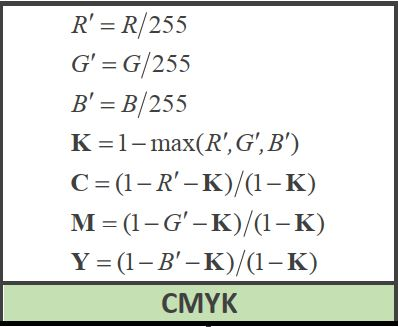


In [ ]:
# Make float and divide by 255 to give BGRdash
bgr= cv2.cvtColor(my_first_image, cv2.COLOR_RGB2BGR)
bgrdash = bgr.astype(float)/255.

# Calculate K as (1 - whatever is biggest out of Rdash, Gdash, Bdash)
K = 1 - np.max(bgrdash, axis=2)

# Calculate C
C = (1-bgrdash[...,2] - K)/(1-K)

# Calculate M
M = (1-bgrdash[...,1] - K)/(1-K)

# Calculate Y
Y = (1-bgrdash[...,0] - K)/(1-K)

# Combine 4 channels into single image and re-scale back up to uint8
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

In [ ]:
plt.imshow(CMYK)

Or the simpler way is to use Pillow, which is a library that is used for image processing, and it has a method called `convert` which converts from one color space to another.
Lets try that

In [ ]:
from PIL import Image
PIL_Image = Image.open("assets/lena.png")
PIL_Image.show()


# Grayscale

The most used color space maybe in all image preprocessing is the grayscale color space. It is used to reduce the complexity of the image, and it is used in many image processing techniques.

By decreasing the complexity, you can speed up processing times, reducing memory usage, and it can also simplify the image, making it easier to analyze. It is fair to say it is not always the best option, but it is a good starting point.

In [ ]:
gray_image = cv2.cvtColor(my_first_image, cv2.COLOR_RGB2GRAY)

In [ ]:

plt.imshow(gray_image, cmap='gray')

# Extra: Binary Images


This is a subset of grayscale images, but it is worth mentioning it. Binary images are images that only have two possible values for each pixel, either 0 or 1. This is useful for many applications, such as image segmentation, and it is also used in many image pre-processing techniques.

In [ ]:
# Basically a threshold is a value that separates the image into two parts:
# 1. Pixels with values below the threshold
# 2. Pixels with values above the threshold
binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)[1]

In [ ]:
plt.imshow(binary_image, cmap='gray')

# Exercise

Now that you know how to read and write images, and how to convert between color spaces, it is time to put it into practice.

Use any image that you want, navigate through all the color spaces that we have seen and plot them using matplotlib

Pro Tip: If you want to use an image from a URL use this snippet

Youll have to install the requests library first via pip : ```!pip install requests```


and then use this code to read the image from the URL
```python   
    import requests
    image_data = requests.get(url).content
    image = cv2.imdecode(np.frombuffer(image_data, np.uint8), 1)
```

In [ ]:
# Optional: if you want to install requests run this cell uncommenting the line below
# !pip install requests